In [25]:
#load packages
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [22]:
#get data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

In [3]:
#get variable types
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

There are two columns that are objects: primary key and state. The other 23 variables are floats.

In [4]:
#find percentage of missing values
education_df.isnull().sum()*100/education_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

Primary key, state, and year do not have any missing values. Average math 4 score, average math 8 score, average reading 4 score, and average reading 8 score all have percentages of missing values above 60%.

In [23]:
#replace missing values with column means
education_df2 = education_df.copy()
fill = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 
        'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
       'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
for col in fill:
    education_df2.loc[:, col].fillna(education_df2.loc[:, col].mean(), inplace=True)

For the majority of variables, it makes sense to replace the missing values with the mean. For average math 4 score, average math 8 score, average reading 4 score, and average reading 8 score, it does not make sense to replace the missing values because so much of the data is missing.

In [20]:
#replace missing values with mean by year
education_df3 = education_df.copy()
years = education_df3['YEAR'].unique()
for col in fill:
    for year in years:
        education_df3.loc[education_df3['YEAR'] == year, col].fillna(education_df3.loc[education_df3['YEAR'] == year, col].mean(), inplace=True)

In [9]:
#interpolate missing values
education_df4 = education_df.copy()
for col in fill:
    education_df4.loc[:, col].interpolate(inplace = True)

In [10]:
#compare values of dataframes with replaced values
pd.concat([education_df2, education_df3, education_df4]).drop_duplicates(keep=False).describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,900.000000,6.730000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.730000e+02,...,769.000000,769.000000,769.000000,7.690000e+02,7.690000e+02,7.270000e+02,229.000000,229.000000,227.000000,170.000000
mean,2006.960000,1.111749e+06,1.386927e+07,1.052181e+06,5.939565e+06,6.877523e+06,1.376252e+07,7.201048e+06,4.191859e+06,6.188722e+05,...,26873.268493,26102.823807,21331.771243,2.148790e+05,9.766664e+04,4.103530e+05,233.046494,277.428697,218.882415,265.209884
std,9.080199,7.447239e+05,1.176003e+07,9.320276e+05,5.337203e+06,5.868446e+06,1.157620e+07,6.134762e+06,3.466389e+06,4.760777e+05,...,46385.563946,44261.368964,40263.092463,3.659423e+05,1.731707e+05,4.343721e+05,10.844841,10.072648,7.332512,6.056488
min,1992.000000,4.386600e+04,5.516680e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.104700e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,192.600553,234.924621,178.557612,246.787755
25%,1999.000000,9.159308e+05,7.535628e+06,6.343320e+05,3.927497e+06,3.096406e+06,7.708845e+06,3.870551e+06,2.425472e+06,4.292046e+05,...,1315.000000,1288.000000,1024.000000,1.049000e+04,5.084000e+03,2.999900e+04,226.798480,271.378439,214.878493,261.045973
50%,2008.500000,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,6587.000000,5030.000000,2819.000000,5.001400e+04,1.480500e+04,3.920750e+05,235.555473,278.023499,219.940098,266.005886
75%,2016.000000,1.595024e+06,2.376653e+07,1.680983e+06,9.277802e+06,1.280774e+07,2.335252e+07,1.224751e+07,7.357292e+06,9.563210e+05,...,50314.000000,48934.000000,34428.000000,4.017370e+05,1.613310e+05,8.024415e+05,240.893297,285.283508,223.930906,268.616822
max,2017.000000,6.226523e+06,8.921726e+07,7.709079e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,485885.000000,465322.000000,492835.000000,3.748465e+06,1.941009e+06,4.717112e+06,249.102674,297.042225,235.699697,280.499130


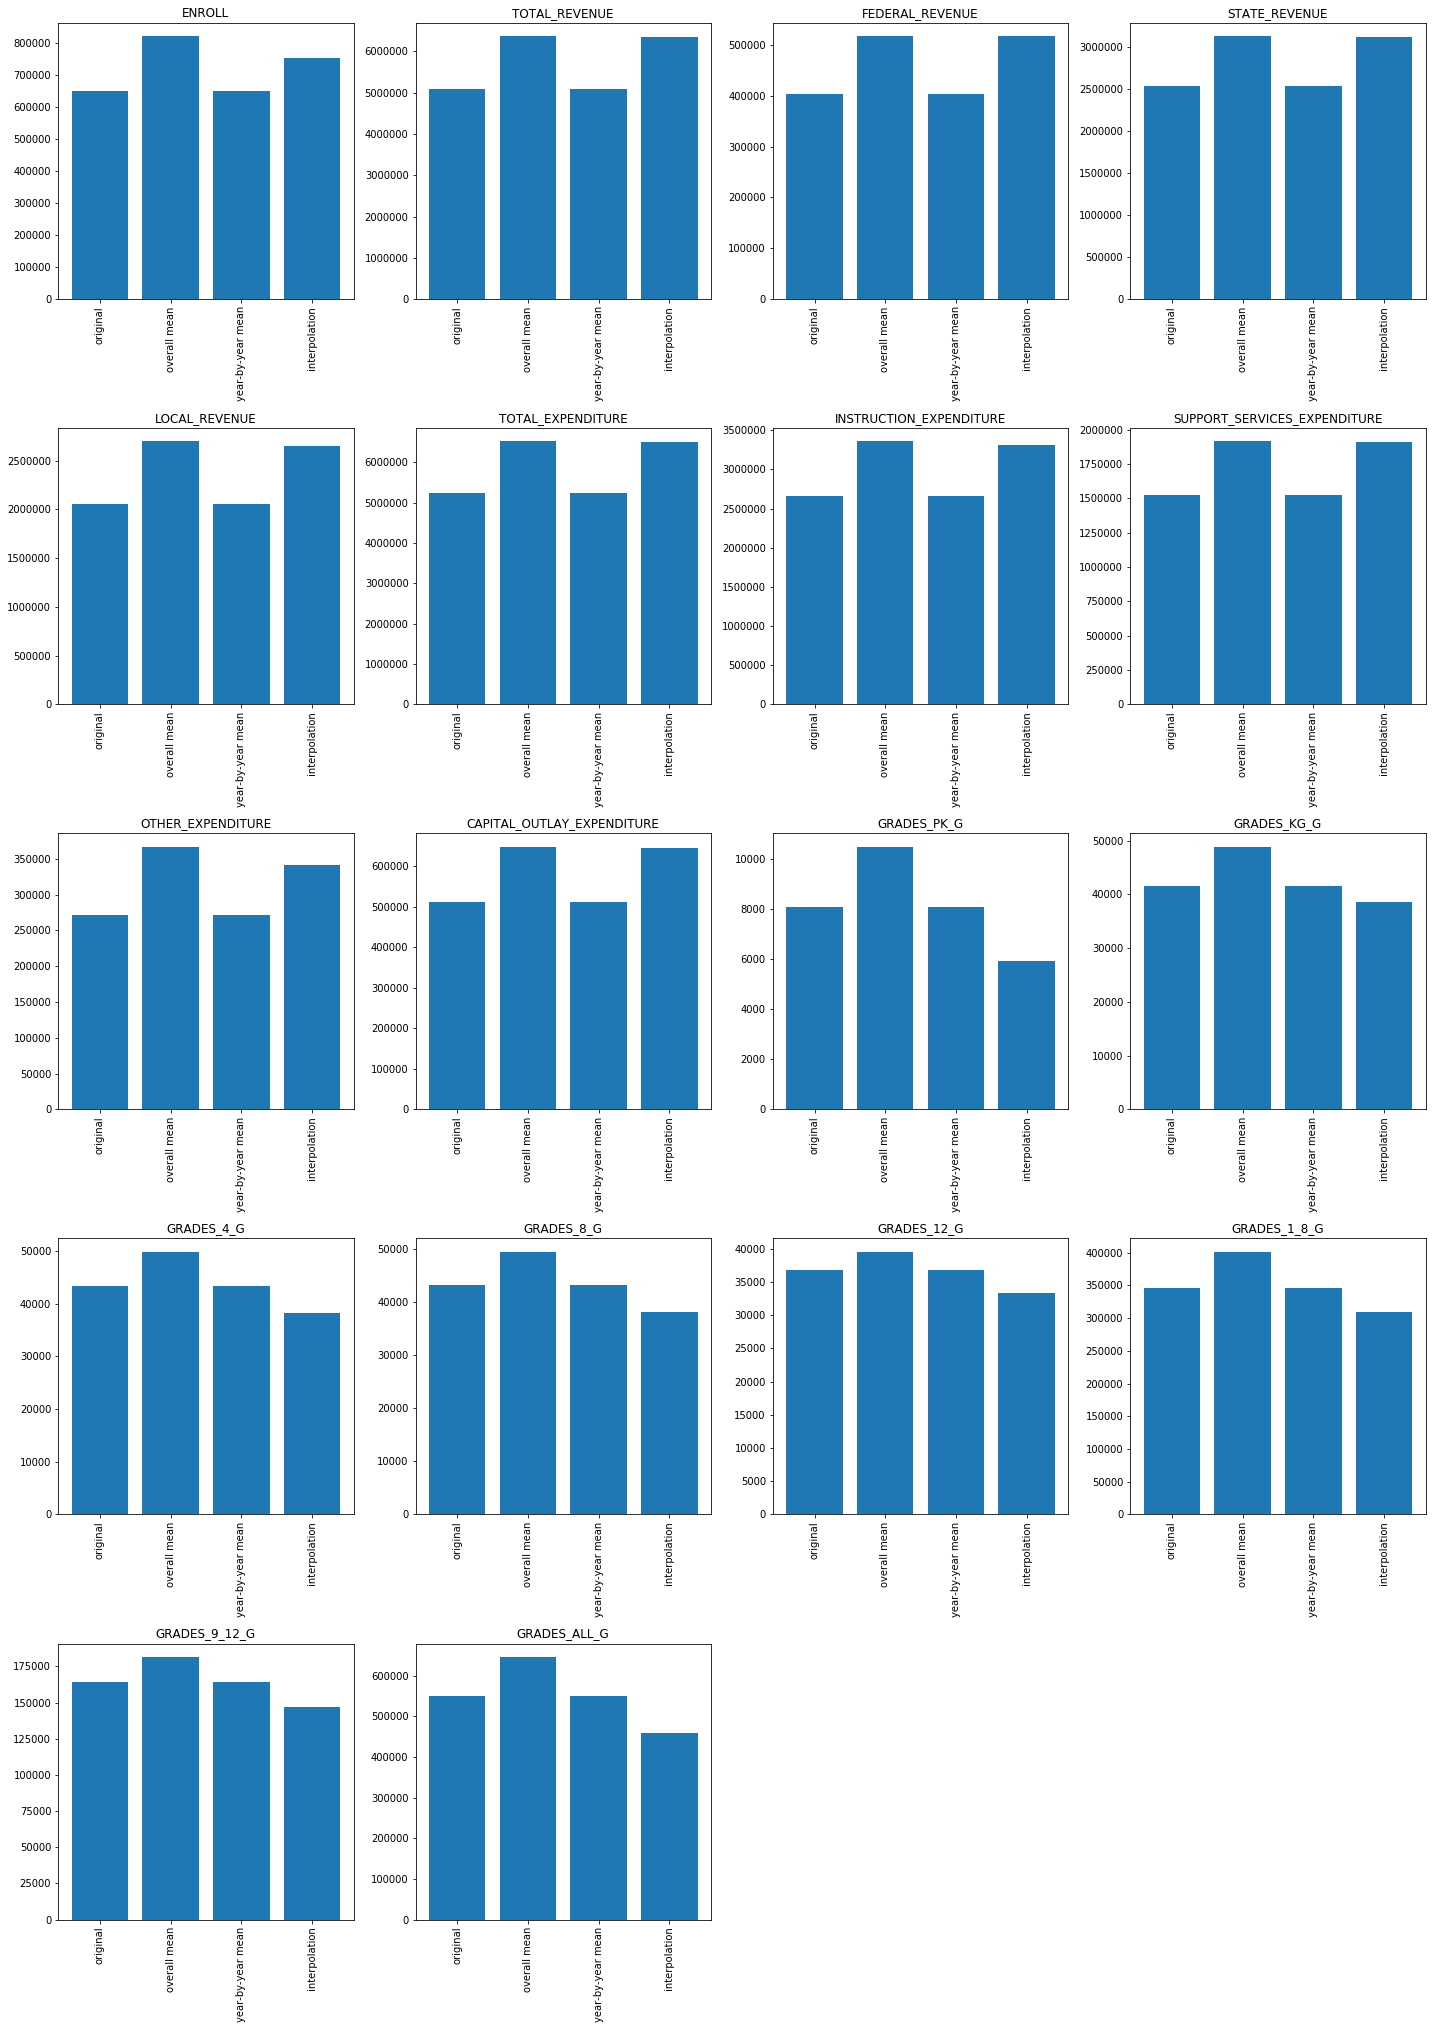

In [29]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill):
    df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
    
    plt.subplot(len(fill), 4, i+1)
    plt.bar(['original', 'overall mean', 'year-by-year mean', 'interpolation'], df.median())
    plt.xticks(rotation='vertical')
    plt.title(col)
    
plt.tight_layout()
plt.show()